In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [26]:
df = pd.read_csv('D:/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [27]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

In [28]:
df['Year'] = df['Day'].map(lambda x : x.year)
df['Month'] = df['Day'].map(lambda x : x.month)
df['Day'] = df['Day'].map(lambda x : x.day)

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [29]:
# ваш код
df.groupby('Year')['t'].mean().argmin()

4

In [30]:
df.groupby('Year')['t'].mean().argmax()

7

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [24]:
# ваш код
df[(df['Month'] == 1) & (df['t'] >= 0)].groupby('Year')['t'].count().argmax()

0

**3.** В каком году было самое холодное лето (по средней температуре)

In [8]:
# ваш код
df[(df['Month'] >= 6) & (df['Month'] <= 8)].groupby('Year')['t'].mean()

Year
2008    18.119565
2009    18.728261
2010    22.119565
2011    21.318681
2012    19.086957
2013    21.543478
2014    20.706522
2015    19.032609
2016    19.326087
Name: t, dtype: float64

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [9]:
# ваш код
df['diff'] = abs(df['t'] - df['t'].shift(-1))

In [10]:
df.iloc[df['diff'].argmax()]

Day        26.0
t          22.0
Year     2014.0
Month       5.0
diff       15.0
Name: 2334, dtype: float64

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='Year'>

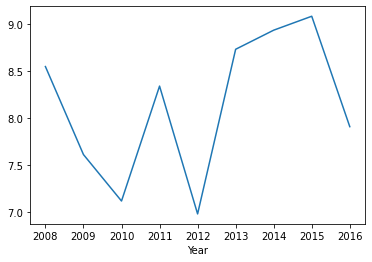

In [11]:
# ваш код
df.groupby('Year')['t'].mean().plot()